#### Change of OS DIR

In [1]:
import os
from collections import Counter

os.chdir('..')

In [2]:
os.getcwd()

'/mnt/c/Users/gvs/ubuntu/neural-review-summarization'

#### Loading of Train Data

In [3]:
from processors.imdb_processor import IMDBProcessor

In [4]:
processor = IMDBProcessor('data/labeledTrainData.tsv')

In [5]:
data_df = processor.load_data()

In [6]:
processor.prepare_data()

  0%|          | 0/25000 [00:00<?, ?it/s]

Generating n_grams


 42%|████▏     | 10537/25000 [02:55<04:01, 60.00it/s]

KeyboardInterrupt: 

Most common / least common n_grams:

In [7]:
processor.print_most_common(processor.bigrams, most_common=100)

[('special effects', 1068), ('i dont', 1049), ('new york', 713), ('first time', 684), ('low budget', 586), ('good movie', 568), ('same time', 562), ('high school', 511), ('main character', 504), ('only thing', 490), ('real life', 482), ('main characters', 421), ('many people', 416), ('long time', 408), ('great movie', 383), ('whole movie', 372), ('bad movie', 372), ('many times', 352), ('whole thing', 346), ('good job', 333), ('good film', 325), ('bad guys', 318), ('i guess', 302), ('other hand', 299), ('great film', 297), ('good thing', 294), ('only reason', 289), ('little bit', 286), ('first movie', 284), ('first film', 276), ('other films', 269), ('few years', 265), ('i didnt', 260), ('bad guy', 249), ('entire movie', 241), ('other movies', 238), ('martial arts', 237), ('great job', 225), ('young woman', 223), ('first place', 218), ('true story', 215), ('young man', 213), ('serial killer', 213), ('entire film', 207), ('many years', 206), ('big screen', 202), ('old man', 202), ('whol

In [8]:
processor.print_lest_common(processor.bigrams)

[('whole ordeal', 6), ('real interest', 6), ('clear story', 6), ('such depth', 6), ('beautiful work', 6), ('military base', 6), ('first show', 6), ('gopal varma', 6), ('individual scenes', 6), ('classic case', 6), ('classic lines', 6), ('nice gore', 6), ('nice bit', 6), ('little heart', 6), ('first woman', 6), ('main issue', 6), ('cinematic world', 6), ('cheap attempt', 6), ('n roll', 6), ('remarkable film', 6), ('basic concept', 6), ('overthetop performance', 6), ('sexy women', 6), ('whole place', 6), ('strong support', 6), ('grand island', 6), ('big bucks', 6), ('other students', 6), ('yellow submarine', 6), ('horrible thing', 6), ('great dialog', 6), ('ronny cox', 6), ('ridiculous movie', 6), ('sylvia kristel', 6), ('local community', 6), ('henry fool', 6), ('unbelievable situations', 6), ('snl skit', 6), ('fulllength feature', 6), ('original score', 6), ('hot shot', 6), ('lucky stars', 6), ('exotic cars', 6), ('outstanding movie', 6), ('romantic films', 6), ('asian girl', 6), ('att

##### Visualizing n_gram counts distributions

Total n_grams 1731


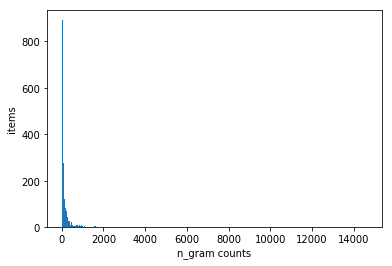

In [9]:
processor.visualize_n_grams_distribution(processor.unigrams)

Total n_grams 6244


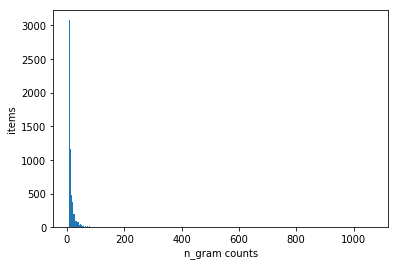

In [10]:
processor.visualize_n_grams_distribution(processor.bigrams)

Total n_grams 1700


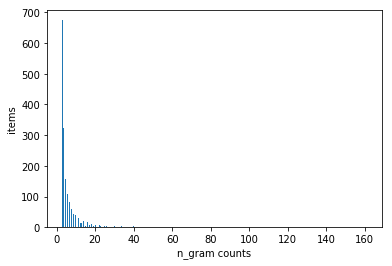

In [11]:
processor.visualize_n_grams_distribution(processor.trigrams)

Saving / loading of processor

In [12]:
processor.save_n_grams()

Saved n_gram files!


In [6]:
processor.load_n_grams()

(      Unnamed: 0                 Phrase  Count
 0              0            much makeup      6
 1              1         patrick wilson      6
 2              2         beautiful city      8
 3              3           strong woman      8
 4              4          good to watch     10
 5              5   wonderful experience      8
 6              6            main stream      7
 7              7            strange man     11
 8              8              good life     15
 9              9              wide shut     12
 10            10        first twothirds      7
 11            11            great music     56
 12            12                   cant    854
 13            13       very real danger      3
 14            14             new batman      8
 15            15        excellent music     11
 16            16             monumental     32
 17            17          famous actors     13
 18            18              impressed    186
 19            19                    odd

#### Testing models

In [4]:
from model.affinity_cluster_model import AffinityClusterModel
from collections import Counter

In [15]:
test_processor = IMDBProcessor('data/test.tsv')#_midnight_cowboy.tsv')
test_data_df = test_processor.load_data(encoding='latin-1')
test_processor.prepare_data(test=True)

  7%|▋         | 3/42 [00:00<00:01, 22.31it/s]

Generating n_grams


100%|██████████| 42/42 [00:01<00:00, 30.28it/s]

Filtering n_grams
Done.


In [15]:
unigrams_cl = AffinityClusterModel()

539it [00:00, 5376.71it/s]

Loading GloVe model..


400000it [01:42, 3905.59it/s]

Done. 400000  words loaded!


In [16]:
unigrams_cl.load_model('unigrams')

100%|██████████| 188/188 [00:00<00:00, 4701.32it/s]


Loading scikit model..
Scikit model loaded.
Model loaded.


In [17]:
unigram_predictions, unigram_original_phrases, unigram_closest_phrases = unigrams_cl.predict(test_processor.unigrams)

100%|██████████| 618/618 [00:00<00:00, 4526.22it/s]


In [28]:
unigram_clusters_usage = Counter(unigram_predictions)
print(unigram_clusters_usage.most_common(30))
unigram_phrases_usage = unigrams_cl.get_clustered_predictions_and_counts(unigram_predictions, unigram_original_phrases)
print(unigram_phrases_usage)

[(151, 78), (119, 42), (143, 22), (110, 21), (84, 15), (175, 15), (21, 13), (116, 13), (20, 12), (103, 12), (113, 12), (154, 11), (98, 10), (123, 10), (87, 9), (184, 9), (14, 7), (45, 7), (72, 7), (126, 7), (128, 7), (30, 6), (118, 6), (180, 6), (0, 5), (29, 5), (44, 5), (47, 5), (61, 5), (108, 5)]
Counter({'bad': 49, 'good': 11, 'same': 10, 'futuristic': 10, 'ive': 9, 'hard': 8, 'much': 8, 'horrible': 7, 'only': 7, 'whoopi': 7, 'detective': 6, 'awful': 6, 'such': 6, 'funny': 6, 'stupid': 6, 'great': 6, 'dont': 5, 'sure': 5, 'new': 5, 'huge': 5, 'little': 5, 'dinosaur': 4, 'overall': 4, 'tough': 4, 'poor': 4, 'amazing': 4, 'painful': 4, 'weird': 4, 'other': 4, 'entire': 4, 'special': 4, 'many': 4, 'im': 4, 'rex': 4, 'violent': 4, 'few': 3, 'original': 3, 'young': 3, 'bottom': 3, 'super': 3, 'unfunny': 3, 'lame': 3, 'first': 3, 'clear': 3, 'due': 3, 'entertaining': 3, 'puerile': 3, 'buddy': 3, 'whole': 3, 'true': 3, 'ridiculous': 3, 'famous': 3, 'flat': 3, 'expensive': 3, 'nonstop': 2, 

In [20]:
unigram_phrases_usage = unigrams_cl.get_phrases_in_good_clusters(unigram_predictions, unigram_original_phrases)

print(unigram_phrases_usage)
print()
unigrams_cl.print_clustered_predictions(unigram_predictions, unigram_original_phrases)

({88: {'sick'}, 35: {'nostalgia', 'uplifting'}, 84: {'enjoyable', 'entertaining', 'gags', 'funny', 'unfunny'}, 1: {'watchable'}, 24: {'passable', 'unbearable'}, 76: {'proud', 'happy', 'glad'}}, {88: 1, 35: 2, 84: 59, 1: 4, 24: 5, 76: 6})

Printing the cluster with 59 mentions
enjoyable
entertaining
gags
funny
unfunny

Printing the cluster with 6 mentions
proud
happy
glad

Printing the cluster with 5 mentions
passable
unbearable

Printing the cluster with 4 mentions
watchable

Printing the cluster with 2 mentions
nostalgia
uplifting

Printing the cluster with 1 mentions
sick



In [6]:
bigrams_cl = AffinityClusterModel()

201it [00:00, 2006.72it/s]

Loading GloVe model..


400000it [01:45, 3789.41it/s]

Done. 400000  words loaded!


In [10]:
bigrams_cl.load_model('bigrams')

100%|██████████| 579/579 [00:00<00:00, 7255.58it/s]


Loading scikit model..
Scikit model loaded.
Model loaded.


In [16]:
bigram_predictions, bigram_original_phrases, bigram_closest_phrases = bigrams_cl.predict(test_processor.bigrams)

100%|██████████| 374/374 [00:00<00:00, 7243.55it/s]


In [17]:
bigram_clusters_usage = Counter(bigram_predictions)
print(bigram_clusters_usage.most_common(30))
bigram_phrases_usage = bigrams_cl.get_clustered_predictions_and_counts(bigram_predictions, bigram_original_phrases)
print(bigram_phrases_usage)

[(393, 15), (158, 11), (14, 8), (24, 5), (567, 5), (100, 5), (212, 5), (256, 5), (331, 5), (384, 5), (15, 4), (530, 4), (48, 4), (54, 4), (278, 4), (314, 4), (352, 4), (29, 3), (98, 3), (147, 3), (186, 3), (230, 3), (258, 3), (292, 3), (295, 3), (313, 3), (356, 3), (379, 3), (402, 3), (405, 3)]
Counter({'bad movie': 7, 'special effects': 4, 'whoopi goldberg': 4, 'bad guys': 4, 'i dont': 4, 'huge ripoff': 4, 'dinosaur detective': 3, 'bad films': 3, 'futuristic story': 2, 'original movie': 2, 'futuristic scenes': 2, 'futuristic tale': 2, 'famous people': 2, 'poor whoopi': 2, 'dont work': 2, 'futuristic cop': 2, 'entire length': 2, 'single worst': 2, 'lame cop': 2, 'massacred jokes': 2, 'good idea': 2, 'buddy cop': 2, 'same plot': 2, 'bad buddy': 2, 'anonymous rex': 2, 'weird character': 2, 'bad comedian': 2, 'mad scientist': 2, 'young children': 2, 'mild violence': 2, 'bad movies': 2, 'ridiculous i': 2, 'acting character': 2, 'horrible movie': 2, 'few films': 2, 'puerile immature': 2, 'b

In [18]:
bigram_phrases_usage = bigrams_cl.get_phrases_in_good_clusters(bigram_predictions, bigram_original_phrases)

print(bigram_phrases_usage)
print()
bigrams_cl.print_clustered_predictions(bigram_predictions, bigram_original_phrases)

Counter({'bad movie': 7, 'huge ripoff': 4, 'bad guys': 4, 'bad films': 3, 'horrible movie': 2, 'lame cop': 2, 'futuristic scenes': 2, 'bad impersonator': 2, 'bad buddy': 2, 'bad movies': 2, 'massacred jokes': 2, 'horrific mess': 1, 'fantastic design': 1, 'dinosaur discrimination': 1, 'anthropomorphic dinosaurs': 1, 'hideous abomination': 1, 'sexual innuendos': 1, 'goldberg movies': 1, 'good action': 1, 'awful movies': 1, 'only joke': 1, 'artistic expression': 1, 'worst movies': 1, 'amazing movie': 1, 'fun action': 1, 'joking aside': 1, 'visual equivalent': 1, 'idiotic dinosaur': 1, 'great film': 1, 'big tax': 1, 'pathetic dinosaur': 1, 'awful whoopi': 1, 'good jokes': 1, 'bad i': 1, 'actual film': 1, 'bad dinosaur': 1, 'infamous bottom': 1, 'spielberg look': 1, 'mediocre movie': 1, 'gags lame': 1, 'bad episode': 1, 'stupid dinosaur': 1, 'big steal': 1, 'abominable film': 1, 'main characters': 1, 'brutal action': 1})

Printing the cluster with 65 mentions
mediocre movie
bad episode
bad 

In [ ]:
trigrams_cl = AffinityClusterModel()

In [7]:
trigrams_cl.load_model('trigrams')

100%|██████████| 188/188 [00:00<00:00, 8963.51it/s]


Loading scikit model..
Scikit model loaded.
Model loaded.


In [17]:
trigrams_cl.predict(['very good movie'])

100%|██████████| 1/1 [00:00<00:00, 1279.92it/s]


([77], ['very good movie'], ['very good film'])

In [20]:
trigram_predictions, trigram_original_phrases, trigram_closest_phrases = trigrams_cl.predict(test_processor.trigrams)

100%|██████████| 109/109 [00:00<00:00, 5975.18it/s]


In [21]:
trigram_clusters_usage = Counter(trigram_predictions)
print(trigram_clusters_usage.most_common(30))
trigram_phrases_usage = trigrams_cl.get_clustered_predictions_and_counts(trigram_predictions, trigram_original_phrases)
print(trigram_phrases_usage)

[(160, 8), (23, 5), (3, 4), (34, 4), (108, 4), (134, 3), (176, 3), (162, 3), (85, 3), (123, 3), (0, 2), (150, 2), (17, 2), (22, 2), (155, 2), (50, 2), (52, 2), (89, 2), (99, 2), (109, 2), (112, 2), (117, 2), (119, 2), (1, 1), (131, 1), (138, 1), (13, 1), (141, 1), (18, 1), (149, 1)]
Counter({'unbearable to listen': 2, 'buddy cop comedy': 2, 'bad buddy cop': 2, 'mild violence language': 2, 'puerile immature line': 2, 'poor whoopi goldberg': 2, 'really bad movie': 2, 'lame cop comedy': 2, 'great to have': 1, 'guilty pleasure badness': 1, 'edgy cyberpunk society': 1, 'evil insane movie': 1, 'theodore rex hollywood': 1, 'first dinosaur police': 1, 'hard to repress': 1, 'mere presence onscreen': 1, 'hard to make': 1, 'realistic environment something': 1, 'very first dinosaur': 1, 'very clichéd role': 1, 'serious theodore rex': 1, 'dull to hold': 1, 'same way i': 1, 'italian gorilla transplant': 1, 'particularly bad episode': 1, 'lonely directionless nomad': 1, 'turkish super hero': 1, 'glow

In [11]:
trigram_phrases_usage = trigrams_cl.get_phrases_in_good_clusters(trigram_predictions, trigram_original_phrases)

print(trigram_phrases_usage)
print()
trigrams_cl.print_clustered_predictions(trigram_predictions, trigram_original_phrases)

({88: {'lonely directionless nomad'}, 182: {'vacant possession lantana'}}, {88: 1, 182: 1})

Printing the cluster with 1 mentions
lonely directionless nomad

Printing the cluster with 1 mentions
vacant possession lantana



#### Training of model

In [7]:
from model.affinity_cluster_model import AffinityClusterModel
from collections import Counter

In [8]:
unigrams_cl = AffinityClusterModel()

198it [00:00, 1975.58it/s]

Loading GloVe model..


400000it [01:41, 3935.00it/s]

Done. 400000  words loaded!


In [10]:
unigrams_cl.train_model(processor.unigrams, 'unigrams')
#unigrams_cl.load_model('unigrams')

 40%|███▉      | 686/1731 [00:00<00:00, 6856.15it/s]

Training started..
Vectorizing phrases..


100%|██████████| 1731/1731 [00:00<00:00, 7599.62it/s]


Vectorization done.
Did not converge
Training completed!
Saving model..


100%|██████████| 188/188 [00:00<00:00, 6074.49it/s]


Saving scikit model...
Scikit model saved.
Model saved.


In [11]:
print('Total clusters count: {}'.format(unigrams_cl.clusters_count()))

cluster_counts = Counter(unigrams_cl.cluster_labels())
print(cluster_counts.most_common(50))

unigrams_cl.print_clusters_examples()

Total clusters count: 188
[(115, 28), (96, 27), (47, 25), (107, 25), (94, 22), (141, 21), (157, 21), (46, 20), (178, 20), (6, 17), (13, 17), (139, 17), (185, 17), (70, 16), (116, 16), (9, 15), (59, 15), (85, 15), (4, 14), (23, 14), (42, 14), (76, 14), (79, 14), (91, 14), (130, 14), (164, 14), (174, 14), (14, 13), (21, 13), (114, 13), (117, 13), (131, 13), (138, 13), (158, 13), (168, 13), (3, 12), (35, 12), (60, 12), (66, 12), (97, 12), (99, 12), (113, 12), (123, 12), (129, 12), (165, 12), (169, 12), (173, 12), (7, 11), (16, 11), (51, 11)]

Printing examples for cluster 115:
guys
understood
watch
understand
sorry
supposed
true
loved
love
come
stick
know
wish
suppose
imagine
wrong
dear
mean
read
forgotten
sure
real
thought
liked
else
afraid
please
guy

Printing examples for cluster 96:
normal
standard
similar
alone
whole
present
actual
relative
comparable
new
usual
opposite
same
particular
type
identical
called
only
different
short
separate
original
current
used
much
latter
equal

Printi

In [13]:
bigrams_cl = AffinityClusterModel()
bigrams_cl.train_model(processor.bigrams, 'bigrams')

407it [00:00, 4066.70it/s]

Loading GloVe model..


400000it [01:49, 3645.98it/s]
 20%|█▉        | 1248/6244 [00:00<00:00, 6234.01it/s]

Done. 400000  words loaded!
Training started..
Vectorizing phrases..


100%|██████████| 6244/6244 [00:01<00:00, 6080.86it/s]


Vectorization done.
Converged after 1438 iterations.
Training completed!
Saving model..


100%|██████████| 579/579 [00:00<00:00, 2166.95it/s]


Saving scikit model...
Scikit model saved.
Model saved.


In [14]:
print('Total clusters count: {}'.format(bigrams_cl.clusters_count()))

cluster_counts = Counter(bigrams_cl.cluster_labels())
print(cluster_counts.most_common(50))

bigrams_cl.print_clusters_examples()

Total clusters count: 579
[(212, 74), (316, 54), (20, 47), (42, 46), (64, 45), (158, 45), (98, 41), (367, 41), (493, 41), (230, 39), (310, 39), (349, 38), (355, 38), (467, 38), (147, 37), (384, 37), (405, 37), (78, 35), (85, 35), (380, 35), (456, 35), (428, 34), (348, 33), (208, 32), (88, 31), (100, 31), (128, 31), (33, 30), (96, 30), (241, 30), (299, 30), (45, 28), (488, 28), (35, 27), (217, 27), (244, 27), (279, 27), (105, 26), (259, 26), (395, 26), (87, 25), (111, 25), (289, 25), (434, 25), (509, 25), (556, 25), (24, 24), (281, 24), (393, 24), (406, 24)]

Printing examples for cluster 212:
i assure
i doubt
possible i
i plan
wish i
alive i
enough i
weak i
i think
frankly i
i thought
else i
i watch
make sure
i aint
i bet
i guess
i feel
i wouldnt
slow i
i guarantee
wrong i
i wonder
sure everyone
i wont
i gotta
fine i
sick i
surprised i
i confess

Printing examples for cluster 316:
good date
good look
good aspects
good one
good work
good start
good choice
only way
good chance
possible w

great job
fantastic job
decent job
remarkable job
okay job
ok job
fabulous job
perfect job
incredible job
brilliant job

Printing examples for cluster 395:
theatrical version
filmed version
original lion
original song
screen version
first version
own version
new version
musical version
modern version
european version
complete version
mst3k version
dubbed version
original text
original concept
english version
extended version
bbc version
original version
original broadway
updated version
original twist
bad version
restored version
original cartoon

Printing examples for cluster 87:
other countries
other members
other peoples
other one
other giants
other end
other species
other hand
other plans
other side
other players
other children
other shows
other places
other part
other brother
other time
other night
other works
other person
other crime
other day
other friends
other half
other examples

Printing examples for cluster 111:
favorite directors
favourite film
favorite scenes
favorite com

In [15]:
trigrams_cl = AffinityClusterModel()
trigrams_cl.train_model(processor.trigrams, 'trigrams')

0it [00:00, ?it/s]

Loading GloVe model..


400000it [01:54, 3507.32it/s]
 82%|████████▏ | 1386/1700 [00:00<00:00, 6927.14it/s]

Done. 400000  words loaded!
Training started..
Vectorizing phrases..


100%|██████████| 1700/1700 [00:00<00:00, 6712.57it/s]


Vectorization done.
Converged after 1532 iterations.
Training completed!
Saving model..


100%|██████████| 189/189 [00:00<00:00, 6222.81it/s]


Saving scikit model...
Scikit model saved.
Model saved.


In [16]:
print('Total clusters count: {}'.format(trigrams_cl.clusters_count()))

cluster_counts = Counter(trigrams_cl.cluster_labels())
print(cluster_counts.most_common(50))

trigrams_cl.print_clusters_examples()

Total clusters count: 189
[(112, 86), (34, 65), (162, 50), (26, 46), (123, 42), (150, 41), (13, 39), (87, 39), (51, 38), (85, 37), (108, 34), (138, 33), (115, 31), (116, 30), (176, 30), (19, 29), (77, 28), (11, 25), (63, 24), (71, 24), (187, 24), (52, 22), (160, 22), (27, 21), (65, 21), (81, 21), (175, 21), (8, 20), (128, 20), (80, 19), (147, 19), (18, 17), (188, 16), (23, 15), (62, 14), (134, 14), (17, 13), (35, 13), (57, 13), (37, 12), (66, 12), (93, 12), (110, 12), (1, 11), (88, 11), (131, 11), (61, 10), (78, 10), (159, 10), (169, 10)]

Printing examples for cluster 112:
able to do
able to turn
able to become
great to begin
able to break
able to show
able to act
able to afford
necessary to make
sufficient to make
possible to keep
unable to lift
able to write
impossible to recommend
potential to make
able to defend
able to finish
impossible to turn
able to run
able to catch
able to maintain
able to come
able to complete
possible to write
unable to give
able to play
able to hold
able 

In [15]:
unigrams_cl.predict(['goal'])

100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]


([72], ['second'])